# 6.1 Exploratory Relationship

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib
import os

In [2]:
path=r'C:\Users\banda\Chocolate'

In [3]:
df=pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'chocolate_ratings.csv'))

In [4]:
df.shape

(1793, 10)

In [5]:
df.head()

,Unnamed: 0,Company\n(Maker-if known),Specific Bean Origin\nor Bar Name,Reference number,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,0,A. Morin,Agua Grande,1876,00:00.0,63%,France,3.75,,Sao Tome
1,1,A. Morin,Kpime,1676,00:00.0,70%,France,2.75,,Togo
2,2,A. Morin,Atsane,1676,00:00.0,70%,France,3.00,,Togo
3,3,A. Morin,Akata,1680,00:00.0,70%,France,3.50,,Togo
4,4,A. Morin,Quilla,1704,00:00.0,70%,France,3.50,,Peru


In [6]:
##Drop unnamed columns in df
df = df.drop(columns = ['Unnamed: 0'])

In [7]:
df.head()


,Company\n(Maker-if known),Specific Bean Origin\nor Bar Name,Reference number,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,00:00.0,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,00:00.0,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,00:00.0,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,00:00.0,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,00:00.0,70%,France,3.50,,Peru


In [8]:
df.shape

(1793, 9)

In [9]:
df.dtypes

Company\n(Maker-if known)             object
Specific Bean Origin\nor Bar Name     object
Reference number                       int64
Review\nDate                          object
Cocoa\nPercent                        object
Company\nLocation                     object
Rating                               float64
Bean\nType                            object
Broad Bean\nOrigin                    object
dtype: object

In [10]:
df.columns

Index(['Company\n(Maker-if known)', 'Specific Bean Origin\nor Bar Name',
       'Reference number', 'Review\nDate', 'Cocoa\nPercent',
       'Company\nLocation', 'Rating', 'Bean\nType', 'Broad Bean\nOrigin'],
      dtype='object')

In [11]:
# change name to read in simplier term 
df.rename(columns= {'Specific Bean Origin\nor Bar Name' : 'Bean_Origin_Name', 
                   'Review\nDate': 'Review_Date', 'Cocoa\nPercent': 'Cocoa_Percent' , 'Company\nLocation': 'Company_Location',
                   'Bean\nType':'Bean_Type', 'Broad Bean\nOrigin':'Bean_Origin','Company\n(Maker-if known)':'Company_Name','Reference number':'Reference_number'},inplace = True)

In [12]:
df.columns

Index(['Company_Name', 'Bean_Origin_Name', 'Reference_number', 'Review_Date',
       'Cocoa_Percent', 'Company_Location', 'Rating', 'Bean_Type',
       'Bean_Origin'],
      dtype='object')

In [13]:
# cheking if the name where change 
df.head()

,Company_Name,Bean_Origin_Name,Reference_number,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Bean_Origin
0,A. Morin,Agua Grande,1876,00:00.0,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,00:00.0,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,00:00.0,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,00:00.0,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,00:00.0,70%,France,3.50,,Peru


In [14]:
sub_df1=df[['Cocoa_Percent', 'Rating']]

In [15]:
# Convert the 'Percentage' column to numeric by removing '%' and converting to float
df['Cocoa_Percent'] = df['Cocoa_Percent'].str.rstrip('%').astype('float') / 100.0

In [16]:
df.head()

,Company_Name,Bean_Origin_Name,Reference_number,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Bean_Origin
0,A. Morin,Agua Grande,1876,00:00.0,0.63,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,00:00.0,0.70,France,2.75,,Togo
2,A. Morin,Atsane,1676,00:00.0,0.70,France,3.00,,Togo
3,A. Morin,Akata,1680,00:00.0,0.70,France,3.50,,Togo
4,A. Morin,Quilla,1704,00:00.0,0.70,France,3.50,,Peru


In [17]:
sub_df1=df[['Cocoa_Percent', 'Rating']]

In [18]:
# Create a correlation matrix using pandas

sub_df1.corr()

,Cocoa_Percent,Rating
Cocoa_Percent,1.000000,-0.164758
Rating,-0.164758,1.000000


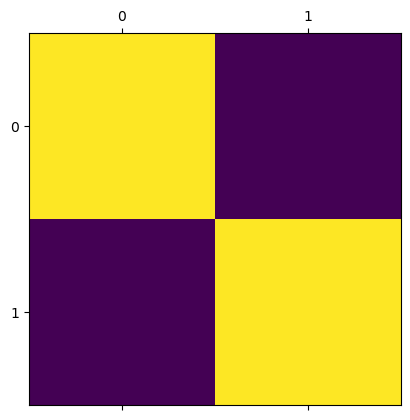

In [19]:
# Create a correlation heatmap using matplotlib

heat=plt.matshow(sub_df1.corr())
plt.show()

In [20]:
heat.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'heat.png'))

From these heat map we were able to see that there is negative correlation between Coao percentage and the rating of the chocolate bar.

C:\Users\banda\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


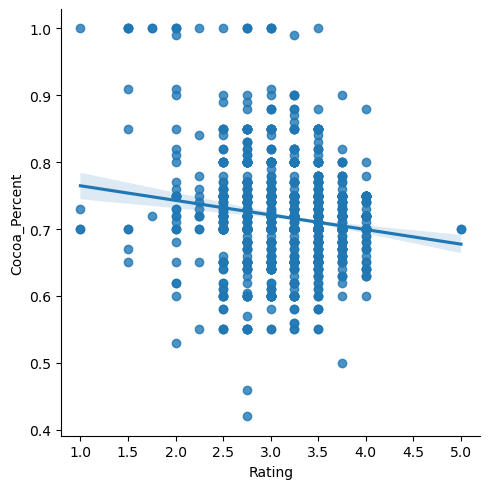

In [21]:
# Create a scatterplot for the "Rating" and "Cocoa_percent" columns in seaborn

sns.lmplot(x = 'Rating', y = 'Cocoa_Percent', data = df)

Again this shws negative tread and is not close to the trend line, the values are all over showing there is not much relationship between the 2 variable. 

C:\Users\banda\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


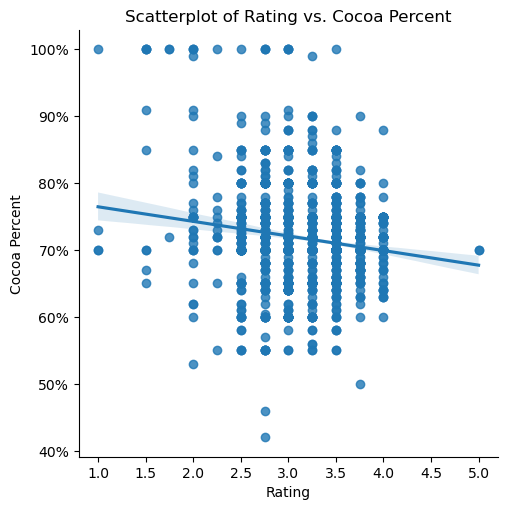

In [22]:
# Create a scatterplot for the "Rating" and "Cocoa_percent" columns in seaborn

scpt=sns.lmplot(x = 'Rating', y = 'Cocoa_Percent', data = df)
# Set the y-axis ticks to be displayed as percentages
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

# Set plot labels and title
plt.xlabel('Rating')
plt.ylabel('Cocoa Percent')
plt.title('Scatterplot of Rating vs. Cocoa Percent')

# Show the plot
plt.show()

In [23]:
scpt.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot.png'))

Exploring Relationships

C:\Users\banda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\banda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\banda\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


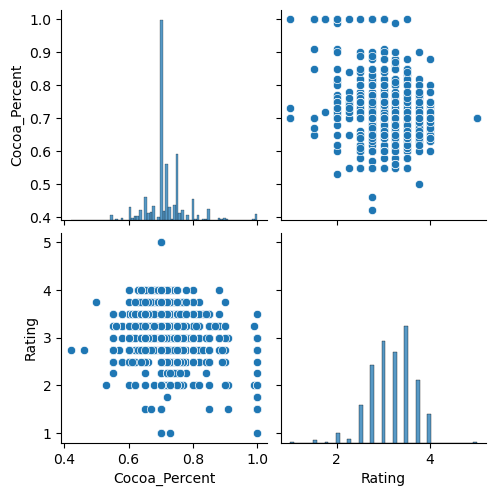

In [24]:
# Create a pair plot 

g2= sns.pairplot(sub_df1)

In [25]:
g2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pairplot.png'))

Categorical Plots

C:\Users\banda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


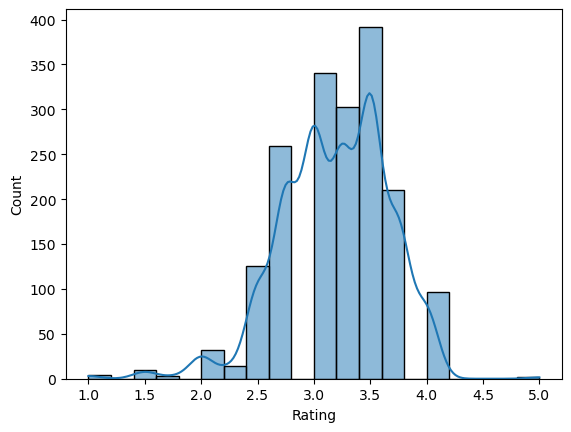

In [26]:
cat=sns.histplot(df['Rating'], bins = 20, kde = True)

In [27]:
cat.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'categorical_plot.png')) 

Cartogorital plot shoe that there are high numbers of chocoaltes that have rating between 3.0-3.75 rating. 

In [28]:
rating_counts = df['Rating'].value_counts()
print(rating_counts)

Rating
3.50    392
3.00    341
3.25    303
2.75    259
3.75    210
2.50    126
4.00     97
2.00     32
2.25     14
1.50     10
1.00      4
1.75      3
5.00      2
Name: count, dtype: int64


here you can see in counts that there are only 2 chocolates that are rated a 5. and 392 that are rated at 3.50.

created a rating flag coolumn in catogories of low raitng /mid rating/ high rating. 

In [29]:
df.loc[df['Rating'] < 2.0, 'Rating Flag'] = 'Low rating'

In [30]:
df.loc[(df['Rating'] >= 2.0) & (df['Rating'] <3.5),'Rating Flag'] = 'Mid rating'

In [31]:
df.loc[df['Rating'] >=3.5 , 'Rating Flag'] = 'High rating'

In [32]:
df.shape

(1793, 10)

In [33]:
df['Rating Flag'].value_counts(dropna = False)

Rating Flag
Mid rating     1075
High rating     701
Low rating       17
Name: count, dtype: int64

C:\Users\banda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\banda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\banda\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


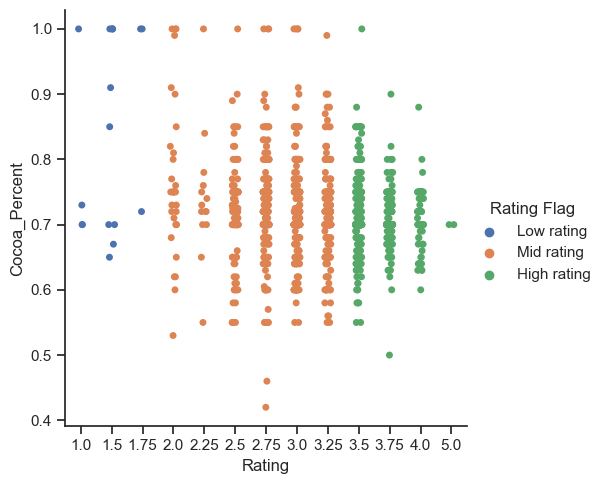

In [34]:
sns.set(style="ticks")
g = sns.catplot(x="Rating", y="Cocoa_Percent", hue="Rating Flag", data=df)

In [35]:
g.savefig("out.png") 

In [36]:
#exporting the image
g.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'rating flag.png'))

In [38]:
path=r'C:\Users\banda\Chocolate'

In [39]:
#import clean Chocolate dataframe
df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'chocoalate_clean1.csv'))